# Xử lý dữ liệu

In [58]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
import seaborn as sns


from sklearn.metrics import fbeta_score, make_scorer
from sklearn.metrics import f1_score, precision_score, recall_score,accuracy_score


In [59]:
df = pd.read_csv('./csv/spam_ham_dataset.csv')
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5171 entries, 0 to 5170
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  5171 non-null   int64 
 1   label       5171 non-null   object
 2   text        5171 non-null   object
 3   label_num   5171 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 161.7+ KB


In [60]:
df.head()

,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0


In [61]:
df = df.drop('Unnamed: 0' , axis=1)

In [62]:
df.head()

,label,text,label_num
0,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,spam,"Subject: photoshop , windows , office . cheap ...",1
4,ham,Subject: re : indian springs\r\nthis deal is t...,0


In [63]:
df.duplicated().sum()

np.int64(178)

In [64]:
df = df.drop_duplicates(keep='first')

In [65]:
df.duplicated().sum()

np.int64(0)

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4993 entries, 0 to 5170
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   label      4993 non-null   object
 1   text       4993 non-null   object
 2   label_num  4993 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 156.0+ KB


In [67]:
df['label'].value_counts()

label
ham     3531
spam    1462
Name: count, dtype: int64

Text(0.5, 1.0, 'Count plt of lables')

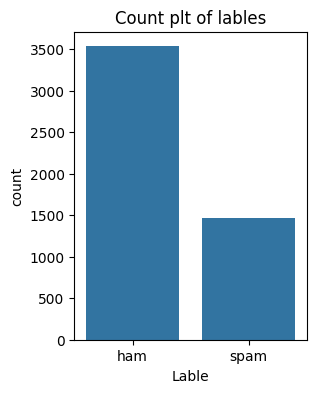

In [68]:
plt.figure(figsize=[3, 4])
sns.countplot(data=df , x='label')
plt.xlabel('Lable')
plt.ylabel('count')
plt.title("Count plt of lables")

In [69]:
df['length'] = df['text'].apply(len)
df.head()

,label,text,label_num,length
0,ham,Subject: enron methanol ; meter # : 988291\r\n...,0,327
1,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0,97
2,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0,2524
3,spam,"Subject: photoshop , windows , office . cheap ...",1,414
4,ham,Subject: re : indian springs\r\nthis deal is t...,0,336


Biểu đồ Boxplot xem độ nhiễu của dữ liệu

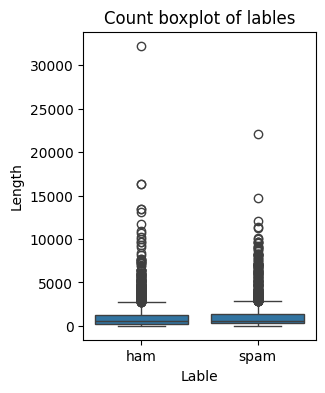

In [70]:
def boxplot_grah():
  plt.figure(figsize=[3, 4])
  sns.boxplot(data=df , x='label' , y='length')
  plt.xlabel('Lable')
  plt.ylabel('Length')
  plt.title("Count boxplot of lables")

boxplot_grah()

In [71]:
from pandas import DataFrame
def remove_outlier_interquartile(data_sms: DataFrame):
  for email in data_sms['label'].unique():
    email_type = data_sms[data_sms['label']==email]
    selected_colum = email_type['length']

    q1:float = selected_colum.quantile(0.25)
    q3:float = selected_colum.quantile(0.75)
    iqr:float =  q3 - q1

    upper_limit = q3 + 1.5 * iqr
    lower_limit = q1 - 1.5 * iqr

    outliers = selected_colum[(selected_colum > upper_limit) | (selected_colum < lower_limit)].index

    data_sms.drop(index=outliers, inplace=True)

remove_outlier_interquartile(df)

In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4571 entries, 0 to 5170
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   label      4571 non-null   object
 1   text       4571 non-null   object
 2   label_num  4571 non-null   int64 
 3   length     4571 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 178.6+ KB


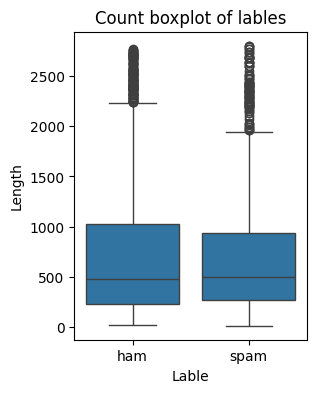

In [73]:
boxplot_grah()

In [74]:
df =df.drop(['label_num', 'length' ]  , axis=1)
df.head()

,label,text
0,ham,Subject: enron methanol ; meter # : 988291\r\n...
1,ham,"Subject: hpl nom for january 9 , 2001\r\n( see..."
2,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar..."
3,spam,"Subject: photoshop , windows , office . cheap ..."
4,ham,Subject: re : indian springs\r\nthis deal is t...


Biến đổi các giá trị trữ thành số

In [76]:
from sklearn.calibration import LabelEncoder


endcoder = LabelEncoder()

df['label'] = endcoder.fit_transform(df['label'])
df.head()

,label,text
0,0,Subject: enron methanol ; meter # : 988291\r\n...
1,0,"Subject: hpl nom for january 9 , 2001\r\n( see..."
2,0,"Subject: neon retreat\r\nho ho ho , we ' re ar..."
3,1,"Subject: photoshop , windows , office . cheap ..."
4,0,Subject: re : indian springs\r\nthis deal is t...


In [77]:
endcoder.classes_

array(['ham', 'spam'], dtype=object)

Chia Dữ liệu làm 3 phần

In [86]:
from typing import List
from numpy import ndarray
from sklearn.model_selection import train_test_split


def define_train(data, test_size:float)-> List[ndarray]:
  """Định nghĩa dữ liệu trả ra cho dễ code

  Returns:
      List[ndarray]: _description_
  """
  return train_test_split(data, test_size=test_size, stratify=data['label'], random_state=128)

train_df, validation_df =define_train(df ,0.2)
val_df, test_df =define_train(validation_df ,0.5)
print(train_df.shape,val_df.shape,test_df.shape)

(3656, 2) (457, 2) (458, 2)


In [90]:
import datasets
dtset = datasets.DatasetDict({
  'train': datasets.Dataset.from_pandas(train_df),
  'val': datasets.Dataset.from_pandas(val_df),
  'test': datasets.Dataset.from_pandas(test_df),
})
dtset

DatasetDict({
    train: Dataset({
        features: ['label', 'text', '__index_level_0__'],
        num_rows: 3656
    })
    val: Dataset({
        features: ['label', 'text', '__index_level_0__'],
        num_rows: 457
    })
    test: Dataset({
        features: ['label', 'text', '__index_level_0__'],
        num_rows: 458
    })
})

In [92]:
dtset = dtset.remove_columns(['__index_level_0__'])
dtset

DatasetDict({
    train: Dataset({
        features: ['label', 'text'],
        num_rows: 3656
    })
    val: Dataset({
        features: ['label', 'text'],
        num_rows: 457
    })
    test: Dataset({
        features: ['label', 'text'],
        num_rows: 458
    })
})

Lấy token 
bert-base-uncased

In [94]:
from transformers import AutoTokenizer
model_name = 'bert-base-uncased'

In [95]:
tokenizer = AutoTokenizer.from_pretrained(model_name)

d:\ai-srv\.venv\Lib\site-packages\huggingface_hub\file_download.py:1142: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


OSError: We couldn't connect to 'https://huggingface.co' to load this file, couldn't find it in the cached files and it looks like bert-base-uncased is not the path to a directory containing a file named config.json.
Checkout your internet connection or see how to run the library in offline mode at 'https://huggingface.co/docs/transformers/installation#offline-mode'.

In [ ]:
def preprocessing_tokenizer(text:datasets.DatasetDict):
  return tokenizer(text['text'], truncation=True, padding='max_length')


tokenized_dataset = dtset.map(preprocessing_tokenizer , batched=True)
tokenized_dataset

In [ ]:
from transformers import AutoModelForSequenceClassification
id2label :dict[int, str]= {0 : 'non_spam' , 1: 'spam'}
label2id :dict[ str ,id]= { 'non_spam': 0  ,  'spam':1}

models = AutoModelForSequenceClassification.from_pretrained(
    model_name , num_labels= 2, id2label = label2id , label2id = id2label
)
models

In [ ]:
import evaluate

metric_evaluation  = evaluate.load("f1")

def compute_mertrucs(eval_pred):
  predictions , label = eval_pred
  pridictions = np.argmax(pridictions, axis=1)
  return metric_evaluation.compute(predictions=predictions, references=label)


In [ ]:
from transformers import TrainingArguments, Trainer

args = TrainingArguments(
  output_dir='my_model',
  report_to='none',
  num_train_epochs=2
)

train = Trainer(
  model = models,
  train_dataset=tokenized_dataset['train'],
  eval_dataset=tokenized_dataset['val'],
  tokenizer=tokenizer,
  args = args,
  compute_metrics=compute_mertrucs

)

In [ ]:
# chay CPU tam 1 ngay
train.train()

Đánh giá kết quả

In [ ]:
y_pred= train.predict(tokenized_dataset['test'])
y_pred = np.argmax(y_pred.predictions, axis=1)

print(f"F1 score: {f1_score(tokenized_dataset['test']['label'] , y_pred)}")

In [ ]:
from sklearn.metrics import confusion_matrix


cfm = confusion_matrix(tokenized_dataset['test']['lable'], y_pred)
cfm